# DATA IMPORT AND INITIAL EXPLORATION

In [1285]:
# Import necessary libraries
import numpy as np 
import pandas as pd

In [1286]:
# Load the Data set
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA INSPECTION

In [1287]:
# Display the shape of the dataframe
df.shape

(891, 12)

In [1288]:
# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
# Display the first few rows of the dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1289]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# DATA CLEANING

In [1290]:
# Fill missing values in the 'Age' column with the mean and convert to integer
df['Age'].fillna(value=df['Age'].mean().astype(int), inplace=True)
df['Age'] = df['Age'].astype(int)

In [1291]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [1292]:
# Check for duplicate rows
df.duplicated().sum()

117

In [1293]:
# Drop duplicate rows
df = df.drop_duplicates()

In [1294]:
# Check for missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [1295]:
# Drop rows with any missing values
df = df.dropna()

In [1296]:
# Verify no missing values remain
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1297]:
# Display the new shape of the dataframe
df.shape

(772, 8)

In [1298]:
# Encode categorical 'Sex' column: male=1, female=0
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})

# Display the cleaned dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


# DATA VISUALIZATION

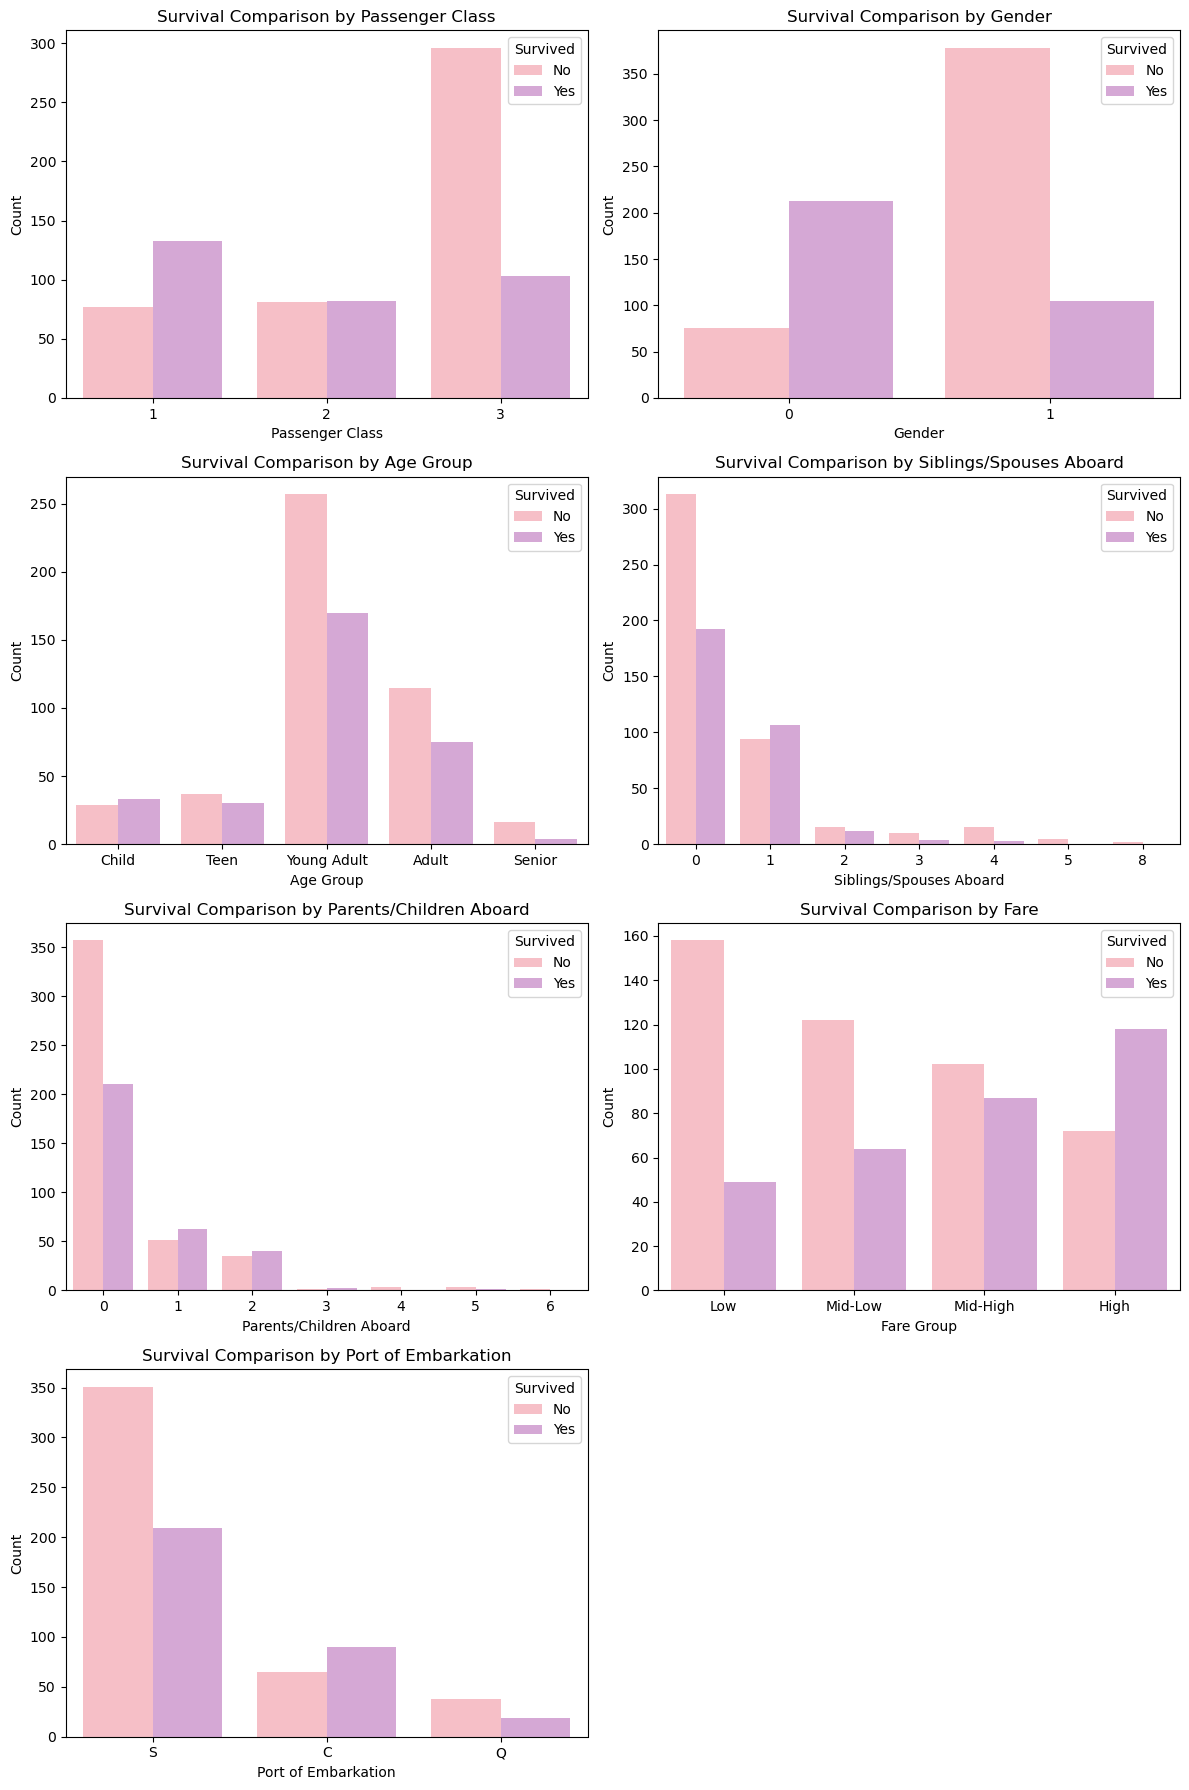

In [1299]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

# Ensure 'Survived' is treated as categorical for the palette
df['Survived'] = df['Survived'].astype(str)

# Define the custom pastel pink and purple palette
pastel_palette = ["#FFB6C1", "#DDA0DD"]

# Plot 1: Comparison of survival counts by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette=pastel_palette, ax=axes[0, 0])
axes[0, 0].set_title('Survival Comparison by Passenger Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Count')
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 2: Comparison of survival counts by Gender
sns.countplot(data=df, x='Sex', hue='Survived', palette=pastel_palette, ax=axes[0, 1])
axes[0, 1].set_title('Survival Comparison by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 3: Comparison of survival counts by Age Group
# Ensure 'Age' is binned for a count plot
age_bins = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(data=age_bins, x=age_bins, hue=df['Survived'], palette=pastel_palette, ax=axes[1, 0])
axes[1, 0].set_title('Survival Comparison by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Count')
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 4: Comparison of survival counts by SibSp
sns.countplot(data=df, x='SibSp', hue='Survived', palette=pastel_palette, ax=axes[1, 1])
axes[1, 1].set_title('Survival Comparison by Siblings/Spouses Aboard')
axes[1, 1].set_xlabel('Siblings/Spouses Aboard')
axes[1, 1].set_ylabel('Count')
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 5: Comparison of survival counts by Parch
sns.countplot(data=df, x='Parch', hue='Survived', palette=pastel_palette, ax=axes[2, 0])
axes[2, 0].set_title('Survival Comparison by Parents/Children Aboard')
axes[2, 0].set_xlabel('Parents/Children Aboard')
axes[2, 0].set_ylabel('Count')
handles, labels = axes[2, 0].get_legend_handles_labels()
axes[2, 0].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 6: Comparison of survival counts by Fare
# Convert 'Fare' to a categorical variable or bin it for better visualization
fare_bin = pd.qcut(df['Fare'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
sns.countplot(data=fare_bin, x=fare_bin, hue=df['Survived'], palette=pastel_palette, ax=axes[2, 1])
axes[2, 1].set_title('Survival Comparison by Fare')
axes[2, 1].set_xlabel('Fare Group')
axes[2, 1].set_ylabel('Count')
handles, labels = axes[2, 1].get_legend_handles_labels()
axes[2, 1].legend(handles, ['No', 'Yes'], title='Survived')

# Plot 7: Comparison of survival counts by Embarked
sns.countplot(data=df, x='Embarked', hue='Survived', palette=pastel_palette, ax=axes[3, 0])
axes[3, 0].set_title('Survival Comparison by Port of Embarkation')
axes[3, 0].set_xlabel('Port of Embarkation')
axes[3, 0].set_ylabel('Count')
handles, labels = axes[3, 0].get_legend_handles_labels()
axes[3, 0].legend(handles, ['No', 'Yes'], title='Survived')

# Remove empty subplot (row 3, column 1)
fig.delaxes(axes[3, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# DATA PREPROCESSING

In [1300]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  772 non-null    object 
 1   Pclass    772 non-null    int64  
 2   Sex       772 non-null    int64  
 3   Age       772 non-null    int32  
 4   SibSp     772 non-null    int64  
 5   Parch     772 non-null    int64  
 6   Fare      772 non-null    float64
 7   Embarked  772 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 67.4+ KB


In [1301]:
# Convert categorical 'Embarked' column to dummy variables
df = pd.get_dummies(df, columns=['Embarked'], dtype='int')

# Display the updated dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.2500,0,0,1
1,1,1,0,38,1,0,71.2833,1,0,0
2,1,3,0,26,0,0,7.9250,0,0,1
3,1,1,0,35,1,0,53.1000,0,0,1
4,0,3,1,35,0,0,8.0500,0,0,1


In [1302]:
# Display the updated dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    772 non-null    object 
 1   Pclass      772 non-null    int64  
 2   Sex         772 non-null    int64  
 3   Age         772 non-null    int32  
 4   SibSp       772 non-null    int64  
 5   Parch       772 non-null    int64  
 6   Fare        772 non-null    float64
 7   Embarked_C  772 non-null    int32  
 8   Embarked_Q  772 non-null    int32  
 9   Embarked_S  772 non-null    int32  
dtypes: float64(1), int32(4), int64(4), object(1)
memory usage: 70.4+ KB


In [1303]:
# Convert 'Survived' to integer
df['Survived'] = df['Survived'].astype(int)

In [1304]:
# Define features and target
x = df.drop('Survived', axis=1)
y = df['Survived']

In [1305]:
# Display features
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22,1,0,7.2500,0,0,1
1,1,0,38,1,0,71.2833,1,0,0
2,3,0,26,0,0,7.9250,0,0,1
3,1,0,35,1,0,53.1000,0,0,1
4,3,1,35,0,0,8.0500,0,0,1


In [1306]:
# Display target
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

# TRAIN-VALIDATION-TEST SPLIT

In [1307]:
# Split the data into training , validation and testing sets
from sklearn.model_selection import train_test_split

X_train , X_temp , Y_train , Y_temp = train_test_split(x , y , test_size = 0.4 , random_state =45)

X_val , X_test , Y_val , Y_test = train_test_split(X_temp , Y_temp , test_size=0.5 , random_state =45)

In [1308]:
# Display shapes of the splits

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print('\n')
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(463, 9)
(154, 9)
(155, 9)


(463,)
(154,)
(155,)


In [1309]:
# Calculate the scale_pos_weight for imbalanced classes
scale_pos_weight = Y_train.value_counts().iloc[0] / Y_train.value_counts().iloc[1]

print("SCALE POSITIVE WEIGHT:", scale_pos_weight)

SCALE POSITIVE WEIGHT: 1.4114583333333333


# MODEL TRAINING (XGBoost)

In [1310]:
# Import the XGBoost classifier model
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight =scale_pos_weight , random_state=42)

In [1311]:
# Train the model on the training data
model.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# MODEL PREDICTIONS ON VALIDATION SET

In [1312]:
# Predict on the validation set
Y_val_pred = model.predict(X_val)

# MODEL EVALUATION ON VALIDATION SET

In [1313]:
# Evaluate the model's performance on validation data set
from sklearn.metrics import accuracy_score

val_pred_accuracy = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {val_pred_accuracy}")

Validation Accuracy: 0.7857142857142857


# MODEL PREDICTIONS ON TEST SET

In [1314]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# MODEL EVALUATION ON TEST SET

In [1315]:
# Evaluate the model's performance on test data set
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7870967741935484
